# Homework 2

Deadline: lab session in the week of **25-28.11.2024**
Each task is worth 1 point.

In [60]:
import torch 
import matplotlib.pyplot as plt
import random 

## 1. Maximization of Functions using Gradient Descent



**Task**:
- (a) Maximize the function $f(x) = -x^4 + 4x^2 - 2x + 1$, where $f: \mathbb{R} \to \mathbb{R}$, using gradient ascent. Implement the optimization using PyTorch and plot the convergence over iterations.
- (b) Maximize the function $f(x, y, z) = -x^2 - y^2 - z^2 + 2xy - yz + 3z$, where $f: \mathbb{R}^3 \to \mathbb{R}$, using gradient ascent. Implement the optimization using PyTorch and visualize the optimization path.


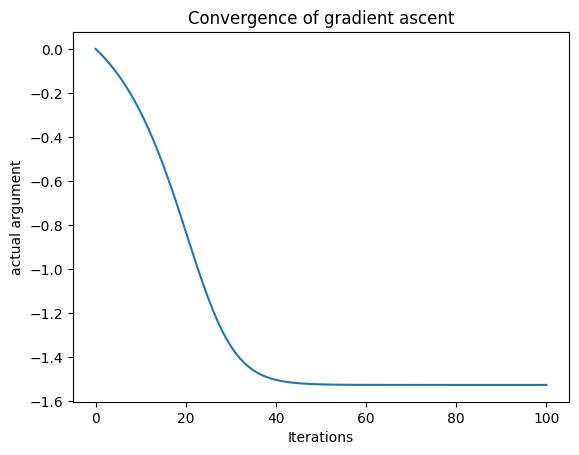

Optimal value: -1.5256868600845337


In [61]:
# (1A)
def fun_to_maximize(x):
    return -x**4 + 4*x**2 - 2*x + 1

def plot(x,y):
    plt.plot(x, y)
    plt.xlabel('Iterations')
    plt.ylabel('actual argument')
    plt.title('Convergence of gradient ascent')
    plt.show()

def gradient_ascent(x, learning_rate, num_iterations):
    x = torch.tensor(x, requires_grad=True)
    history = [x.item()]
    optimizer = torch.optim.SGD([x], lr=learning_rate)
    for i in range(num_iterations):
        optimizer.zero_grad()
        gain = -fun_to_maximize(x)
        gain.backward()
        optimizer.step()
        history.append(x.item())
    plot([i for i in range(num_iterations+1)], history)
    print(f'Optimal value: {x.item()}')

gradient_ascent(0.0, 0.01, 100)
    

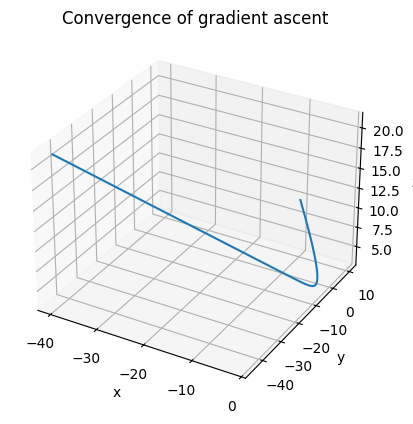

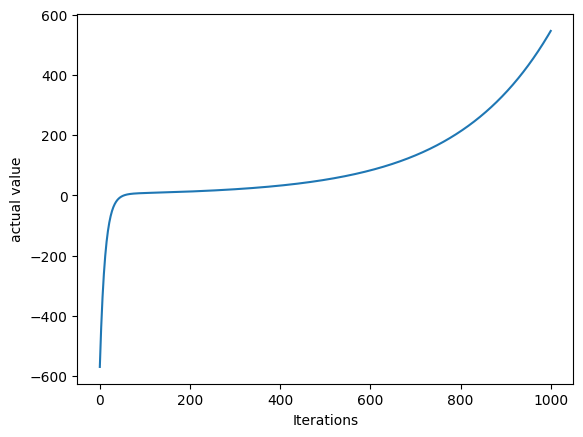

Optimal value: -40.00942611694336, -45.086002349853516, 21.50471305847168


In [62]:
# (1B) Odp: z wykresu możemy wywnioskować, że nasza funkcja nie ma globalnego maximum, w widzimy ,że jej wartość stale rośnie,
# wraz z kolejnymi iteracjami, gdy zmienimy liczbę iteracji np do 10^5 zauważymy taką samą zależność, z tym ,że wykresy będą mniej czytelne
# ponieważ wartości będą zbyt duże. Wybór innych parametrów początkowych ma wpływ, na to jak szybko funkcja będzie zbiegać.

def fun_to_maximize2(x,y,z):
    return -x**2 -y**2 -z**2 + 2*x*y - y*z + 3*z

def plot2(x,y,z):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(x, y, z)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    plt.title('Convergence of gradient ascent')
    plt.show()
    
def plot_fun_value(x,y):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(x, y)
    ax.set_xlabel('Iterations')
    ax.set_ylabel('actual value')
    plt.show()
  
def gradient_ascent2(x, y, z, learning_rate, num_iterations):
    x = torch.tensor(x, requires_grad=True)
    y = torch.tensor(y, requires_grad=True)
    z = torch.tensor(z, requires_grad=True)
    history_x = [x.item()]
    history_y = [y.item()]
    history_z = [z.item()]
    history_value = [fun_to_maximize2(x, y, z).item()]
    optimizer = torch.optim.SGD([x, y, z], lr=learning_rate)
    for i in range(num_iterations):
        optimizer.zero_grad()
        gain = -fun_to_maximize2(x, y, z)
        gain.backward()
        optimizer.step()
        history_x.append(x.item())
        history_y.append(y.item())
        history_z.append(z.item())
        history_value.append(fun_to_maximize2(x, y, z).item())
    plot2(history_x, history_y, history_z)
    plot_fun_value([i for i in range(num_iterations+1)], history_value)
    print(f'Optimal value: {x.item()}, {y.item()}, {z.item()}')
    
gradient_ascent2(-10.0, 10.0, 10.0, 0.01, 1000)



## 2. Linear Regression in PyTorch


**Dataset**: Use the following code to generate a synthetic dataset with 100 samples, each with one feature:


Optimal value: w=2.9996845722198486, b=4.019050121307373
Optimal value: w=2.9996845722198486, b=4.019050121307373


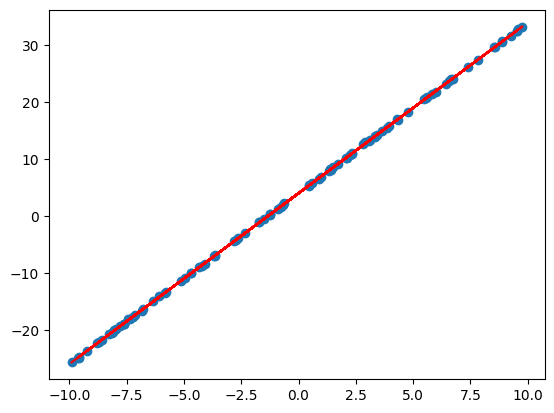

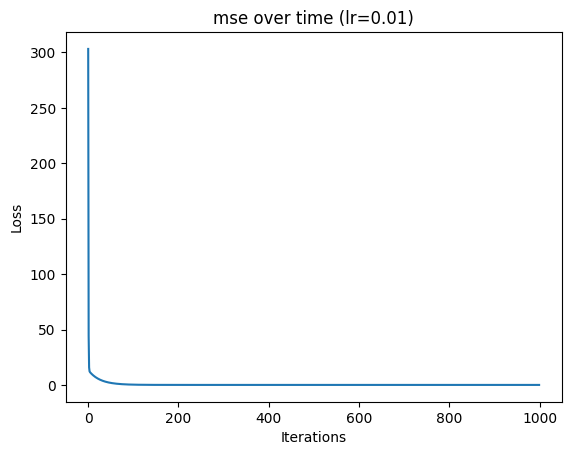

Predictions of 2,3,4: [[10.018419]
 [13.018105]
 [16.017788]]


In [63]:
# (2)
from torch.autograd import Variable
import numpy as np
np.random.seed(0)
X = np.random.uniform(-10, 10, 100)
epsilon = np.random.normal(0, 0.1, 100)
y = 3 * X + 4 + epsilon

class LinearRegression:
    def __init__(self, learning_rate, num_iterations, display_info = False):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.loss_history = []
        self.model = torch.nn.Linear(1, 1) 
        self.model.weight.data.fill_(0.0)
        self.mse = torch.nn.MSELoss() 
        self.optimizer = torch.optim.SGD(self.model.parameters(), lr=self.learning_rate)
        self.display_info = display_info
  
    def fit(self, X, y):
        X = X.copy()
        y = y.copy()
        for i in range(self.num_iterations):
            inputs = Variable(torch.from_numpy(X).float().view(-1, 1))
            targets = Variable(torch.from_numpy(y).float().view(-1, 1))
            self.optimizer.zero_grad()
            outputs = self.model(inputs)
            loss = self.mse(outputs, targets)
            loss.backward()
            self.optimizer.step() 
            self.loss_history.append(loss.item())
            
            if self.display_info:
                print(f"Iteration {i+1}/{self.num_iterations}")
                print(f"  Loss (MSE): {loss.item():.5f}")
                print(f"  Weight: {self.model.weight.item():.5f}")
                print(f"  Bias: {self.model.bias.item():.5f}")
                print(f"  Gradient (Weight): {self.model.weight.grad.item():.5f}")
                print(f"  Gradient (Bias): {self.model.bias.grad.item():.5f}")
                print(f"  Current lr {self.optimizer.param_groups[0]['lr']}")
                print("--------------------------------------------------")
            
    def get_time(self) -> list[int]:
        return [i for i in range(self.num_iterations)]
    
    def plot_mse_over_time(self):
        plt.plot(self.get_time(), self.loss_history)
        plt.xlabel('Iterations')
        plt.ylabel('Loss')
        plt.title(f'mse over time (lr={self.learning_rate})')
        plt.show()
        
    def plot_function_and_data_points(self,Xn,yn):
        plt.scatter(Xn, yn)
        print(f"Optimal value: w={self.model.weight.item()}, b={self.model.bias.item()}")
        print(f"")
        plt.plot(Xn, self.get_w() * Xn + self.get_b(), color='red')
        plt.show()
        
        
    
    def predict(self, X):
        Xn = torch.tensor(X, dtype=torch.float32)
        return self.model(Xn.unsqueeze(1)).detach().numpy()
    
    def get_w(self):
        return self.model.weight.item()
    
    def get_b(self):
        return self.model.bias.item()
    
    def print_params(self):
        print(f"Optimal value: w={self.model.weight.item()}, b={self.model.bias.item()}")
    
 
linear_r = LinearRegression(0.01, 1000)
linear_r.fit(X, y)
linear_r.print_params()
linear_r.plot_function_and_data_points(X,y)
linear_r.plot_mse_over_time()
print(f"Predictions of 2,3,4: {linear_r.predict([2.0, 3.0, 4.0])}")
 




**Task**: Implement a linear regression model using PyTorch to predict the target variable $y$. Train the model to minimize the Mean Squared Error (MSE).


## 3. Learning Rate Analysis

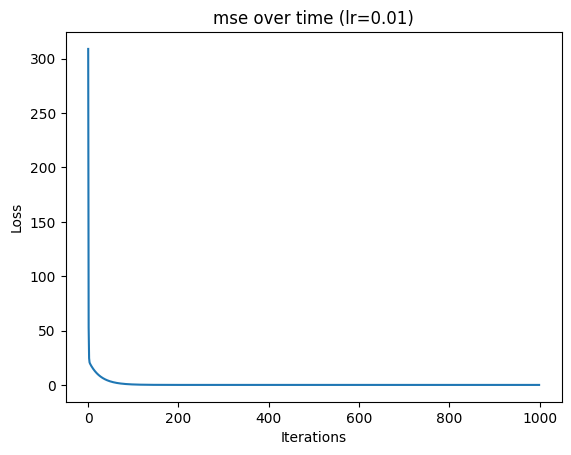

Optimal value: w=2.9996845722198486, b=4.019050121307373


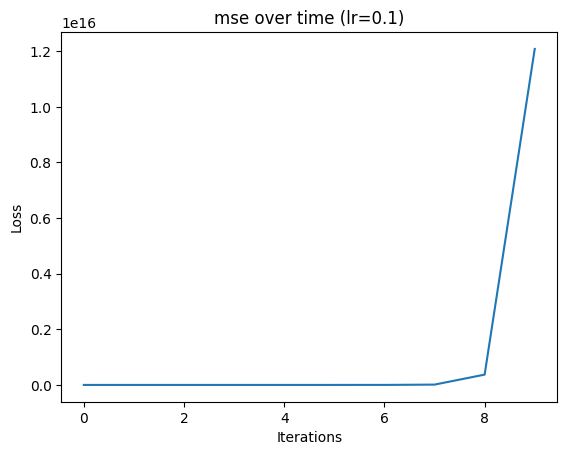

Optimal value: w=-108350784.0, b=1811125.5


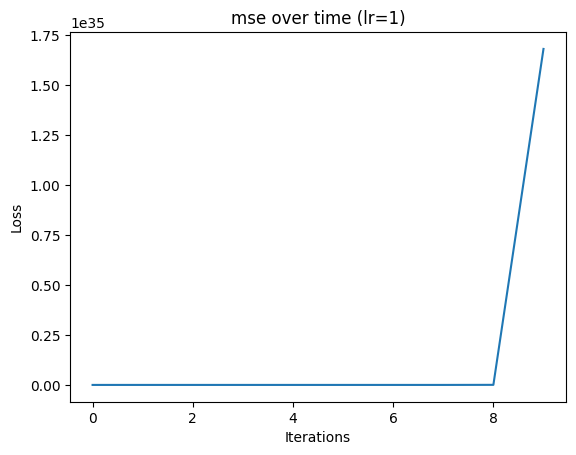

Optimal value: w=-4.68072820182614e+18, b=7.824003625176269e+16


In [64]:
# (3) moją funkcją gradient_descent() jest metoda fit() z klasy LinearRegression z poprzedniego zadania
# motywacja: zachowanie konwencji nazewniczej. A różne parametry learning_rate są przekazywane jako argumenty do konstruktora klasy LinearRegression, tak samo jak liczba iteracji.
# z wykresów  widzimy ,że dla współczynników lr = 0.1 oraz 1.0 nasza jest rozbieżna.


linear_r1 = LinearRegression(0.01, 1000)
linear_r1.fit(X, y)
linear_r1.plot_mse_over_time()
linear_r1.print_params()

linear_r2 = LinearRegression(0.1, 10)
linear_r2.fit(X, y)
linear_r2.plot_mse_over_time()
linear_r2.print_params()

linear_r3 = LinearRegression(1, 10)
linear_r3.fit(X, y)
linear_r3.plot_mse_over_time()
linear_r3.print_params()
    


**Dataset**: Use the same dataset from Problem 2.

**Task**: Modify the `gradient_descent()` function to include different learning rates (0.01, 0.1, 1.0). Visualize the convergence behaviors of gradient descent with each learning rate.


## 4. Polynomial Regression Extension


**Dataset**: Use the following code to create a dataset of 100 samples:


Optimal value: w=46.44792175292969, b=-15.31478214263916


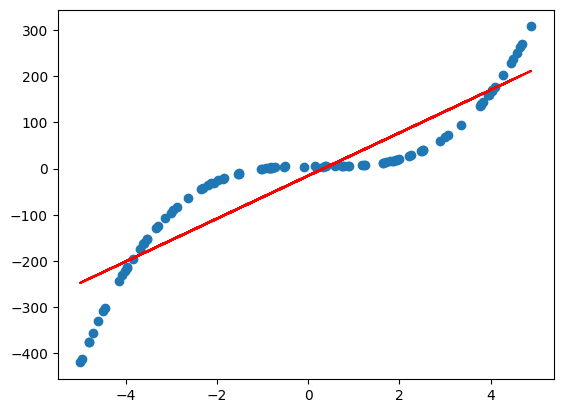

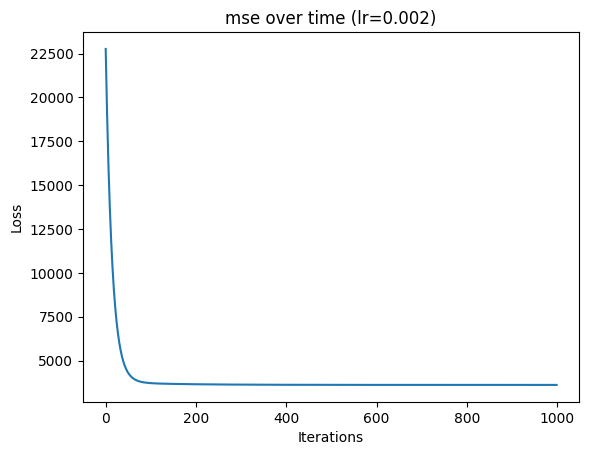

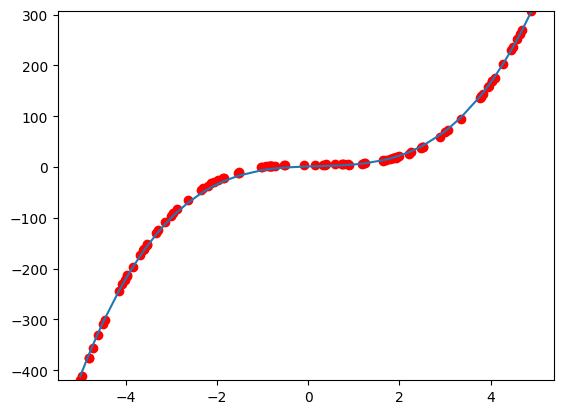

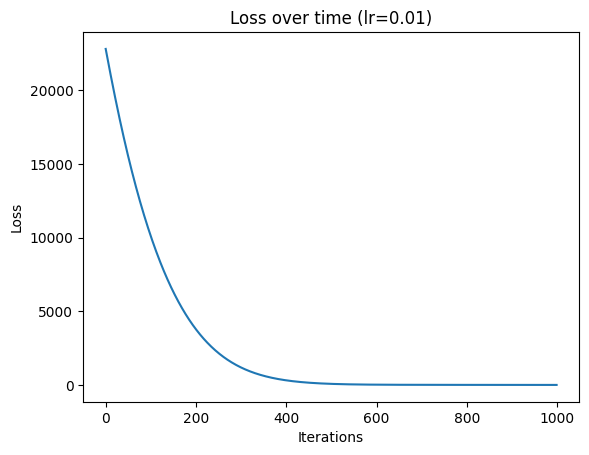

Optimal weights: tensor([ 1.1959,  2.6846, -1.7457,  2.8507], requires_grad=True)
final loss of linear_regression: 3616.4560546875
weights of linear_regression: 46.44792175292969 -15.31478214263916
final loss of polynomial_regression: 15.89561653137207


In [65]:
np.random.seed(1)
X = np.random.uniform(-5, 5, 100)
epsilon = np.random.normal(0, 0.5, 100)
y = 3 * X**3 - 2 * X**2 + 5 + epsilon

class PolynomialRegression:
    def __init__(self, learning_rate, num_iterations, degree, scale_args=False, l2 = False):
        self.scale_args = scale_args
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.degree = degree
        self.w = torch.zeros(degree + 1, requires_grad=True)
        self.loss_history = []
        self.l2 = l2
        self.X = None
        self.y = None
    
        
    def fit(self, X, y):
        self.X = X.copy()
        self.y = y.copy()
        if self.scale_args:
            X, y = self.scale(X, y)
        Xn = torch.tensor(X, dtype=torch.float32)
        yn = torch.tensor(y, dtype=torch.float32)
        optimizer = torch.optim.Adam([self.w], lr=self.learning_rate)
        
        for i in range(self.num_iterations):
            if self.l2:
                l2_reg = sum([self.w[i]**2 for i in range(self.degree + 1)])
                print(self.w)
                print("with l2 regularization")
                print(l2_reg)
            else:
                l2_reg = 0
            optimizer.zero_grad()
            yt = torch.sum(self.w * torch.pow(Xn.unsqueeze(1), torch.arange(self.degree +1 , dtype=torch.float32)), dim=1)
            loss = torch.mean((yt - yn) ** 2) + 0.01 * l2_reg
            loss.backward()
            optimizer.step()
            self.loss_history.append(loss.item())
            
    def scale(self, X, y):
        return (X - np.mean(X)) / np.std(X), (y - np.mean(y)) / np.std(y)
    
    def predict(self, X):
        Xn = torch.tensor(X, dtype=torch.float32)
        yt = torch.sum(self.w * Xn.unsqueeze(1)**torch.tensor([i for i in range(self.degree + 1)]), dim=1)
        return yt
    
    def get_time(self) -> list[int]:
        return [i for i in range(self.num_iterations)]
    
    def plot_loss_over_time(self):
        plt.plot(self.get_time(), self.loss_history)
        plt.xlabel('Iterations')
        plt.ylabel('Loss')
        plt.title(f'Loss over time (lr={self.learning_rate})')
        plt.show()
        
    def plot_function_and_data_points(self):
        Xn = torch.tensor(self.X, dtype=torch.float32)
        yt = torch.sum(self.w * Xn.unsqueeze(1)**torch.tensor([i for i in range(self.degree + 1)]), dim=1)
        yt = yt.detach().numpy()
        xt = Xn.detach().numpy()
        points = [(xt[i],yt[i]) for i in range(len(xt))]
        points.sort(key=lambda x: x[0])
        xt = [x[0] for x in points]
        yt = [x[1] for x in points]
        y_max = max(self.y)  
        y_min = min(self.y)
        plt.ylim(bottom=y_min)
        plt.ylim(top=y_max)
        plt.scatter(self.X,self.y,color='red')
        plt.plot(xt, yt)
        plt.show()
        
    def calculate_mse(self, X, y):
        y_pred = self.predict(X)
        mse = torch.mean((y_pred - torch.tensor(y, dtype=torch.float32)) ** 2)
        return mse.item()

       
    def print_params(self):
        print(f"Optimal weights: {self.w}")
        
linear_r4 = LinearRegression(0.002, 1000)
linear_r4.fit(X,y)
linear_r4.plot_function_and_data_points(X,y)
linear_r4.plot_mse_over_time()
    
polynomial_r = PolynomialRegression(0.01, 1000, 3)
polynomial_r.fit(X, y)
polynomial_r.plot_function_and_data_points()
polynomial_r.plot_loss_over_time()
polynomial_r.print_params()


print(f"final loss of linear_regression: {linear_r4.loss_history[-1]}")
print(f"weights of linear_regression: {linear_r4.model.weight.item()} {linear_r4.model.bias.item()}")
print(f"final loss of polynomial_regression: {polynomial_r.loss_history[-1]}")


**Task**: Implement polynomial regression of degree 3 using PyTorch. Train the model and compare the training loss to that of a simple linear regression model.


## 5. Overfitting and Regularization


**Dataset**: Use the following code to generate a dataset with 150 samples:


Optimal value: w=1.884124994277954, b=59.51642990112305


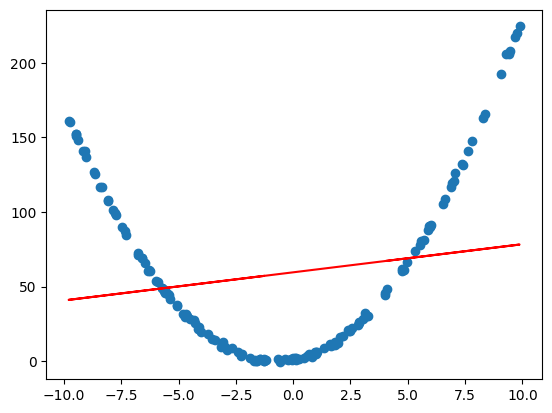

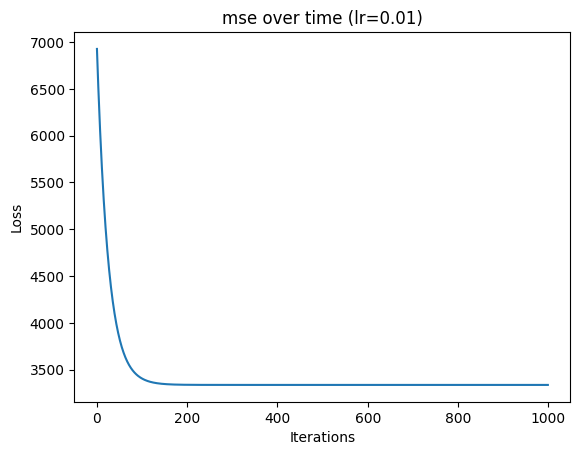

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], requires_grad=True)
with l2 regularization
tensor(0., grad_fn=<AddBackward0>)
tensor([0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100,
        0.0100, 0.0100], requires_grad=True)
with l2 regularization
tensor(0.0011, grad_fn=<AddBackward0>)
tensor([0.0026, 0.0174, 0.0026, 0.0026, 0.0026, 0.0026, 0.0026, 0.0026, 0.0026,
        0.0026, 0.0026], requires_grad=True)
with l2 regularization
tensor(0.0004, grad_fn=<AddBackward0>)
tensor([-0.0046,  0.0246, -0.0046, -0.0046, -0.0046, -0.0046, -0.0046, -0.0046,
        -0.0046, -0.0046, -0.0046], requires_grad=True)
with l2 regularization
tensor(0.0008, grad_fn=<AddBackward0>)
tensor([-0.0076,  0.0276, -0.0076, -0.0076, -0.0076, -0.0076, -0.0076, -0.0076,
        -0.0076, -0.0076, -0.0076], requires_grad=True)
with l2 regularization
tensor(0.0013, grad_fn=<AddBackward0>)
tensor([-0.0066,  0.0266, -0.0066, -0.0066, -0.0066, -0.0066, -0.0066, -0.0066,
        -0.0066, -0

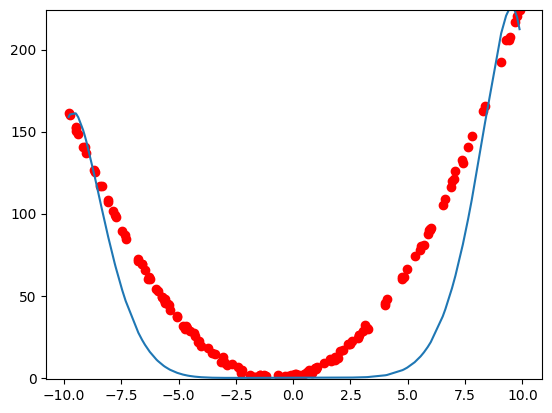

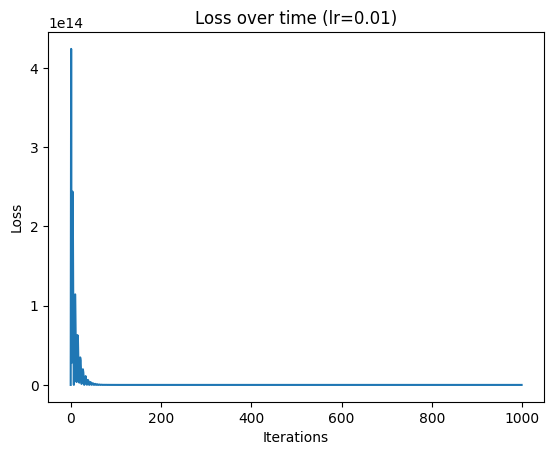

mse: 1042.2657470703125


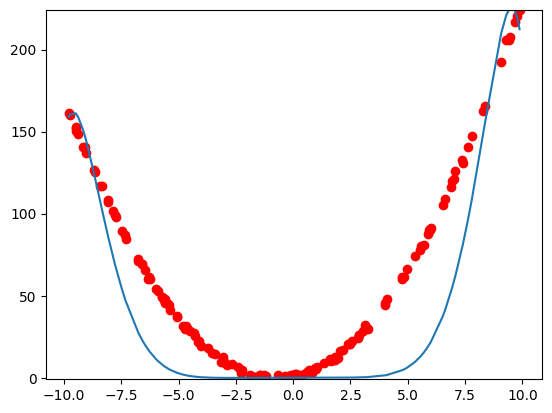

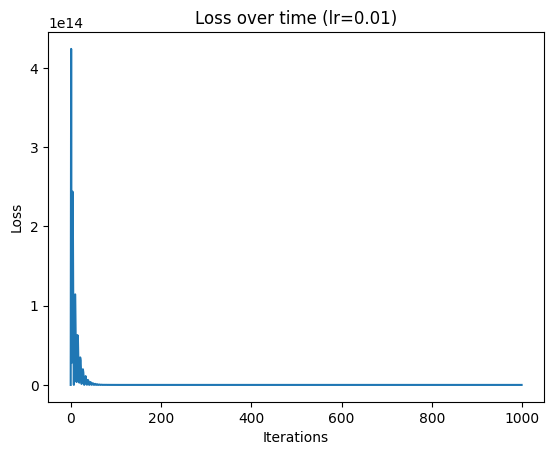

final loss of linear_regression: 3336.6767578125
final loss of polynomial_regression: 1042.987060546875
final loss of polynomial_regression without regularization: 1042.987060546875


In [66]:

np.random.seed(2)
X = np.random.uniform(-10, 10, 150)
epsilon = np.random.normal(0, 1, 150)
y = 2 * X**2 + 3 * X + 1 + epsilon

linear_r5 = LinearRegression(0.01, 1000)
linear_r5.fit(X, y)
linear_r5.plot_function_and_data_points(X,y)
linear_r5.plot_mse_over_time()

polynomial_r2 = PolynomialRegression(0.01, 1000, 10, False, True)
polynomial_r2.fit(X, y)
polynomial_r2.plot_function_and_data_points()
polynomial_r2.plot_loss_over_time()
print("mse:", polynomial_r2.calculate_mse(X, y))

polynomial_r3 = PolynomialRegression(0.01, 1000, 10,False, False)
polynomial_r3.fit(X, y)
polynomial_r3.plot_function_and_data_points()
polynomial_r3.plot_loss_over_time()



print(f"final loss of linear_regression: {linear_r5.loss_history[-1]}")
print(f"final loss of polynomial_regression: {polynomial_r2.loss_history[-1]}")
print(f"final loss of polynomial_regression without regularization: {polynomial_r3.loss_history[-1]}")





**Task**: Fit two models: (i) a linear regression model, and (ii) a polynomial regression model of degree 10. Compare the training and validation performance of both models. Apply L2 regularization to the polynomial model and observe the effect on overfitting.


## 6. Custom Gradient Descent in PyTorch

Custom Linear Regression
Optimal value: a=2.999681234359741, b=4.018868923187256


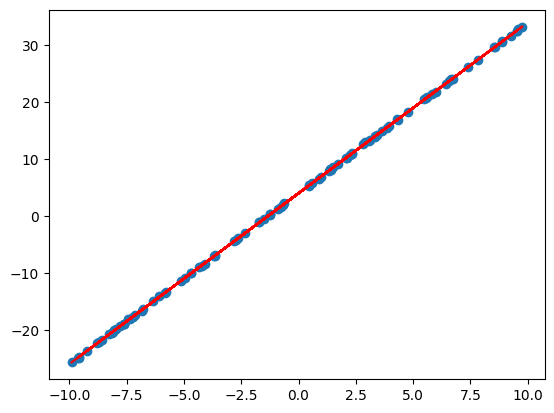

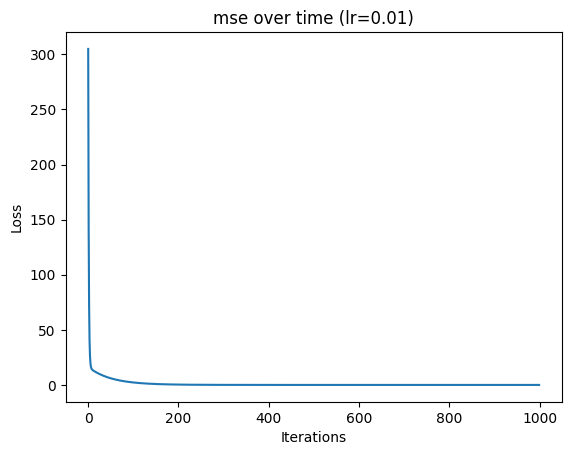

Predictions of 2,3,4: tensor([10.0182, 13.0179, 16.0176])
PyTorch Linear Regression
Optimal value: w=2.9996845722198486, b=4.019050121307373
Optimal value: w=2.9996845722198486, b=4.019050121307373


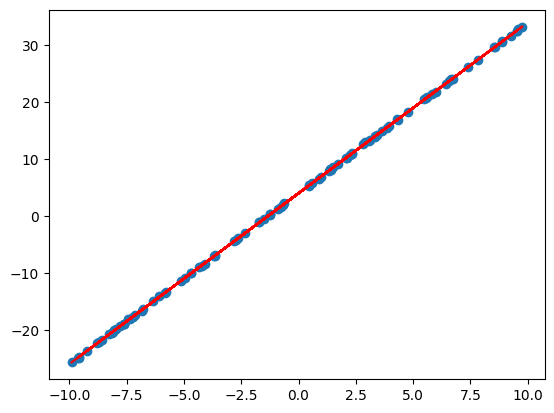

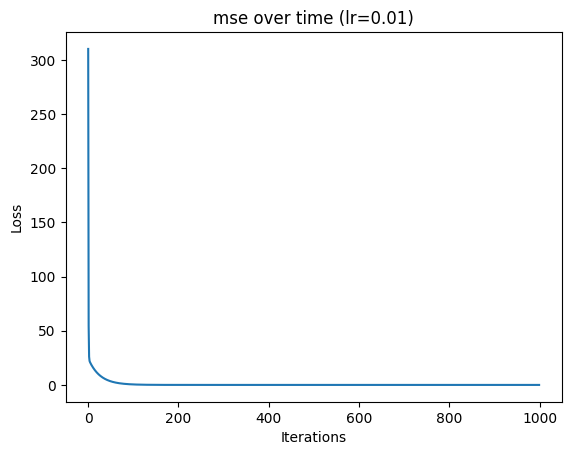

Predictions of 2,3,4: [[10.018419]
 [13.018105]
 [16.017788]]


In [67]:
# (6) Wnioski po porównaniu:
# Widzimy ,że nasza implementacja zwraca wyniki bardzo zbliżone do tych zaimplementowanych w PyTorchu,
# jednakże nasza implementacja zbiega wolniej co można dostrzec zmieniając liczbę iteracji na 100

np.random.seed(0)
X = np.random.uniform(-10, 10, 100)
epsilon = np.random.normal(0, 0.1, 100)
y = 3 * X + 4 + epsilon


class CustomLinearRegression:
    def __init__(self, learning_rate, num_iterations, display_info = False):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.loss_history = []
        self.a = torch.tensor(0.0)
        self.b = torch.tensor(0.0)
        self.display_info = display_info
        
    def actualize_params(self,X,y):
        self.a = self.a - self.learning_rate  * self.calculate_gradient_weight(X, y)
        self.b = self.b - self.learning_rate  * self.calculate_gradient_bias(X, y)
        
    def calculate_gradient_weight(self, X, y):
        return torch.mean((self.a * X + self.b - y) * X)
    
    def calculate_gradient_bias(self, X, y):
        return torch.mean(self.a * X + self.b - y)

  
    def fit(self, X, y):
        X = X.copy()
        y = y.copy()
        for i in range(self.num_iterations):
            inputs = Variable(torch.from_numpy(X).float().view(-1, 1))
            targets = Variable(torch.from_numpy(y).float().view(-1, 1))
            loss = torch.mean((self.a * inputs + self.b - targets) ** 2)
            grad_a = self.calculate_gradient_weight(inputs, targets)
            grad_b = self.calculate_gradient_bias(inputs, targets)   
            self.actualize_params(inputs, targets)
            self.loss_history.append(loss.item())
            if self.display_info:
                print(f"Iteration {i+1}/{self.num_iterations}")
                print(f"  Loss (MSE): {loss.item():.5f}")
                print(f"  Weight: {self.a.item():.5f}")
                print(f"  Bias: {self.b.item():.5f}")
                print(f"  Gradient (Weight): {grad_a:.5f}")
                print(f"  Gradient (Bias): {grad_b:.5f}")  
                print("--------------------------------------------------")
                
    def get_time(self) -> list[int]:
        return [i for i in range(self.num_iterations)]
    
    def plot_mse_over_time(self):
        plt.plot(self.get_time(), self.loss_history)
        plt.xlabel('Iterations')
        plt.ylabel('Loss')
        plt.title(f'mse over time (lr={self.learning_rate})')
        plt.show()
        
    def plot_function_and_data_points(self,X,y):
        plt.scatter(X, y)
        plt.plot(X, linear_r.get_w() * X + linear_r.get_b(), color='red')
        plt.show()
        
    def predict(self, X):
        Xn = torch.tensor(X, dtype=torch.float32)
        return self.a * Xn + self.b
        
    def get_a(self):
        return self.a.item()
        pass
    
    def get_b(self):
        return self.b.item()
        pass
    
    def print_params(self):
        print(f"Optimal value: a={self.a.item()}, b={self.b.item()}")
        
print("Custom Linear Regression")        
custom_linear_r = CustomLinearRegression(0.01, 1000)
custom_linear_r.fit(X, y)
custom_linear_r.print_params()
custom_linear_r.plot_function_and_data_points(X,y)
custom_linear_r.plot_mse_over_time()
print(f"Predictions of 2,3,4: {custom_linear_r.predict([2.0, 3.0, 4.0])}")

print("PyTorch Linear Regression")
linear_r6 = LinearRegression(0.01, 1000)
linear_r6.fit(X, y)
linear_r6.print_params()
linear_r6.plot_function_and_data_points(X,y)
linear_r6.plot_mse_over_time()
print(f"Predictions of 2,3,4: {linear_r6.predict([2.0, 3.0, 4.0])}")


    


**Dataset**: Use the same dataset from Problem 2.

**Task**: Implement a custom gradient descent algorithm without using an optimizer from `torch.optim`. Train a linear regression model using this custom implementation and compare the training results with those obtained using PyTorch's `SGD` optimizer.


## 7. Dataset Size and Convergence


**Dataset**: Use the following code to create three datasets of sizes 50, 100, and 500 samples:


Dataset 1
PyTorch Linear Regression


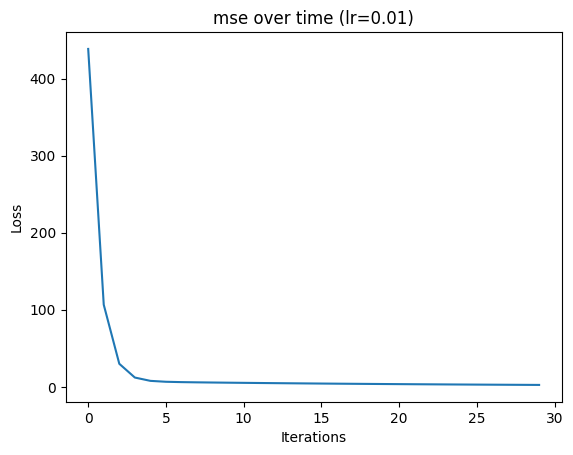

Custom Linear Regression


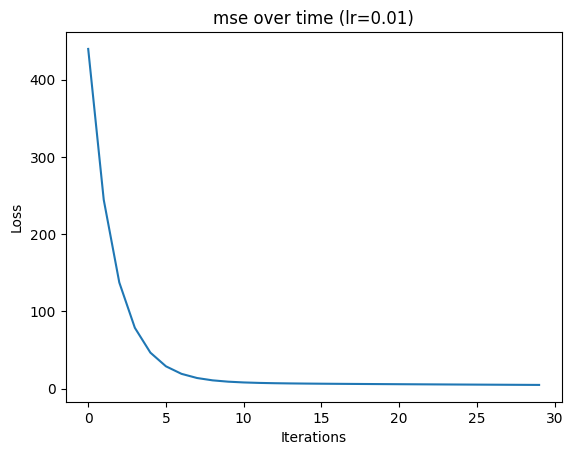

--------------------------------------------------
Dataset 2
PyTorch Linear Regression


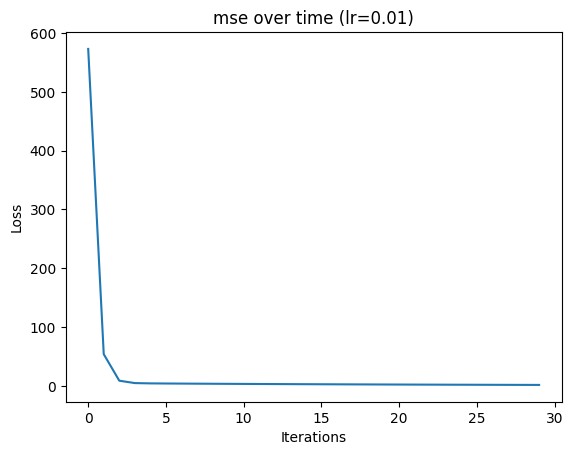

Custom Linear Regression


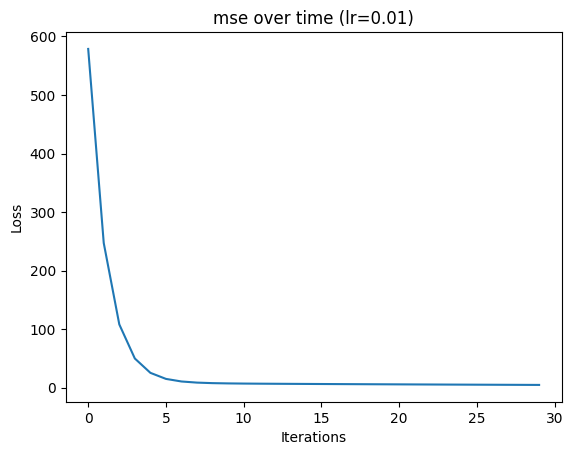

--------------------------------------------------
Dataset 3
PyTorch Linear Regression


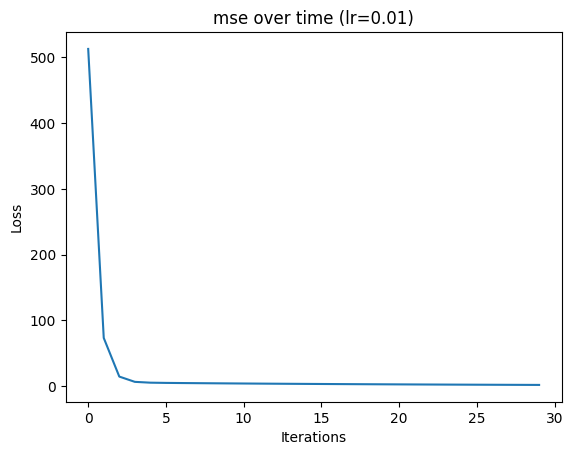

Custom Linear Regression


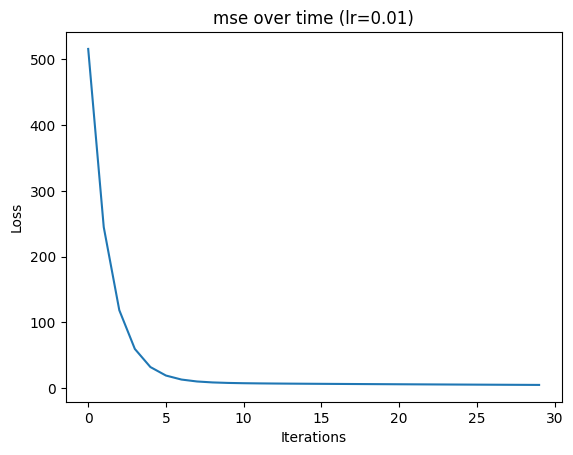

--------------------------------------------------


In [68]:
# (7) Mozemy zauważyć ,że im większe zbiory danych tym ostrzejsza tzn czybsza zbieżnośc, co jest zgodne z intuicją, ponieważ im więcej danych tym bardziej zbliżamy się do prawdziwego rozkładu danych.
np.random.seed(3)
sizes = [50, 100, 500]
datasets = []
for size in sizes:
    X = np.random.uniform(-10, 10, size)
    epsilon = np.random.normal(0, 0.2, size)
    y = 4 * X - 3 + epsilon
    datasets.append((X, y))
    


for i, (X, y) in enumerate(datasets):
    linear_r7 = LinearRegression(0.01,30)
    custom_linear_r2 = CustomLinearRegression(0.01, 30)
    print(f"Dataset {i+1}")
    print("PyTorch Linear Regression")
    linear_r7.fit(X, y)
    linear_r7.plot_mse_over_time()
    print("Custom Linear Regression")
    custom_linear_r2.fit(X, y)
    custom_linear_r2.plot_mse_over_time()
    print("--------------------------------------------------")



**Task**: Train linear regression models on each dataset using PyTorch. Compare the convergence rates of gradient descent for each dataset size by plotting the training loss over epochs.


## 8. Effect of Model Complexity on Overfitting


**Dataset**: Use the following code to generate a dataset of 200 samples:


Polynomial regression of degree 5


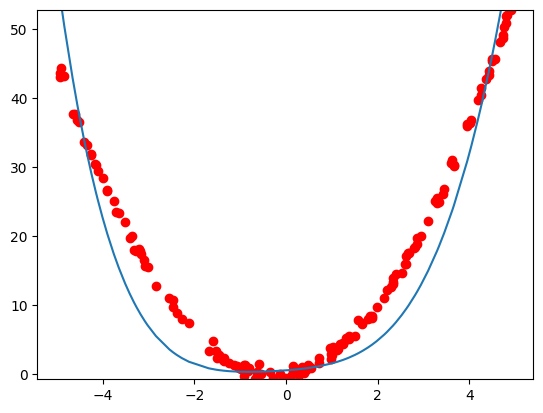

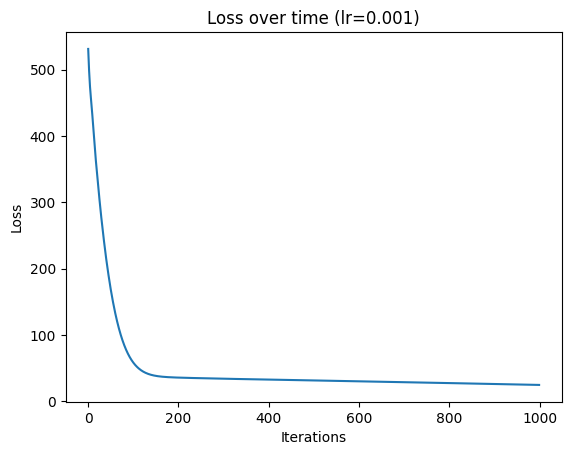

calculated validation mse: 22.88729476928711
calculated training mse: 24.299131393432617
Polynomial regression of degree 15


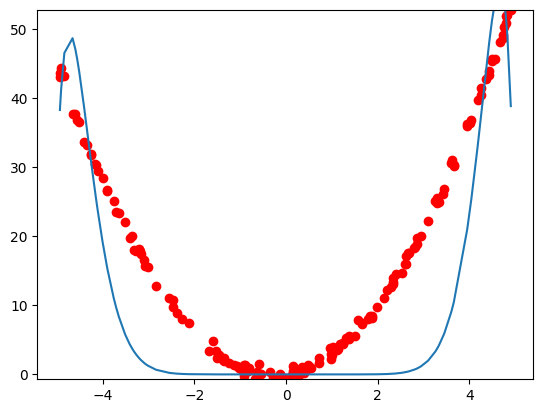

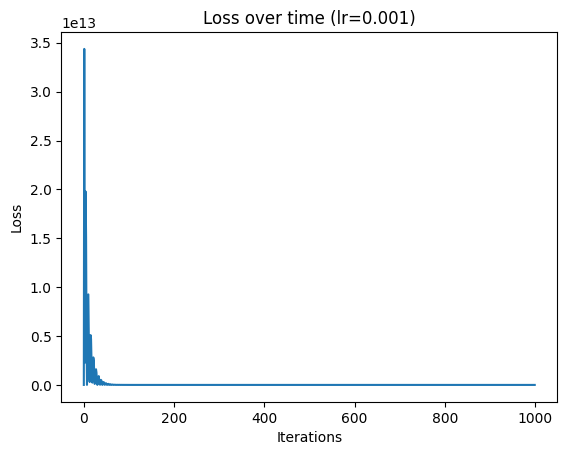

calculated validation mse: 121.58138275146484
calculated training mse: 106.36372375488281


In [69]:
# (8) Wnioski
# Widzimy ,że lepiej sprawuje się model o mniejszej liczbie parametrów, ponieważ model o większej liczbie parametrów
np.random.seed(4)
X = np.random.uniform(-5, 5, 200)
epsilon = np.random.normal(0, 0.5, 200)
y = 2 * X**2 + X + epsilon

X_train = X[:160]
y_train = y[:160]
X_val = X[160:]
y_val = y[160:]
print("Polynomial regression of degree 5")
polynomial_r4 = PolynomialRegression(0.001, 1000, 5)
polynomial_r4.fit(X_train, y_train)
polynomial_r4.plot_function_and_data_points()
polynomial_r4.plot_loss_over_time()
y_pred = polynomial_r4.predict(X_val)
val_mse = torch.mean((y_pred - torch.tensor(y_val, dtype=torch.float32)) ** 2)
print("calculated validation mse:", val_mse.item())
print("calculated training mse:", polynomial_r4.calculate_mse(X, y))


print("Polynomial regression of degree 15")
polynomial_r5 = PolynomialRegression(0.001, 1000, 15)
polynomial_r5.fit(X_train, y_train)
polynomial_r5.plot_function_and_data_points()
polynomial_r5.plot_loss_over_time()
y_pred = polynomial_r5.predict(X_val)
val_mse = torch.mean((y_pred - torch.tensor(y_val, dtype=torch.float32)) ** 2)
print("calculated validation mse:", val_mse.item())
print("calculated training mse:", polynomial_r5.calculate_mse(X, y))




**Task**: Fit polynomial regression models of degrees 5 and 15 to the dataset. Plot the training and validation errors for both models.


## 9. Gradient Descent for Non-linear Data


**Dataset**: Use the following code to generate a dataset of 100 samples:


In [70]:

np.random.seed(5)
X = np.random.uniform(-2 * np.pi, 2 * np.pi, 100)
epsilon = np.random.normal(0, 0.1, 100)
y = np.sin(X) + epsilon



**Task**: Implement gradient descent to fit a linear model to this dataset. Discuss the challenges and limitations of fitting a linear model to non-linear data.
